# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/
---
* [0.DL&tensorboard 복습 ](#복습 ) <br>

* [1.TF& scikit 연동: tf.keras.wrappers ](#tf.keras.wrappers ) <br>
     *  [KerasClassifier](#KerasClassifier)
     *  [KerasRegressor](#KerasRegressor)
 
* [2. 성능](#성능) <br>
     *  [2.1 Underfitting: High Bias](#high-bias)
     *  [2.2 Overfitting:  High Variance](#high-variance)
         * [ 과대적합 방지전략 : 전통적인 머신러닝 기법](#전통적인-머신러닝-기법)
         * [ 과대적합 방지전략 : 딥러닝 기법 ](#딥러닝-기법)<br>
             * [모델 단순화](#모델-단순화)
                 * [ 볼륨 줄이기](#볼륨-줄이기)
                 * [ epochs](#epochs)
                     * [ EarlyStopping](#EarlyStopping)<br>
                 * [ Dropout](#Dropout)
                     * [trainable](#trainable)<br>
             * [가중치 규제 : L1,L2](#가중치-규제)<br>
             * [데이터 늘리기 : Augmentation](#Augmentation)<br>
             * [ Normalization](#Normalization)<br>             
                 * [BatchNormalization](#BatchNormalization)<br>
                 * [LayerNormalization](#LayerNormalization)<br>
                 * [WeightNormalization](#WeightNormalization)<br>
 ---

## 복습
[20200813일자 복습](https://github.com/hysKim1/AI_Fundamental/blob/master/200813_11기_기본저녁반_필기.ipynb): 딥너링 과정 + tensforboard

In [1]:
import tensorflow as tf
import seaborn as sns

In [42]:
import keras

In [4]:
tf.debugging.set_log_device_placement(True)

In [2]:
iris= sns.load_dataset('iris')

In [3]:
iris.species=iris.species.map({'setosa':0, 'versicolor':1, 'virginica':2})

In [7]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,input_shape=(4,),activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(3,activation='relu')
])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalN

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:lo

In [9]:
tb=tf.keras.callbacks.TensorBoard()

In [10]:
h=model.fit(iris.iloc[:,:-1].values, iris.species.values, epochs=10, batch_size=1)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Ide

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /j

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
 69/150 [============>.................] - ETA: 0s - loss: 1.0945Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
150/150 [==============================] - 1s 6ms/step - loss: 1.0520
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 2/10
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
  1/150 [..............................] - ETA: 0s - loss: 1.0560Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/devi

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
 77/150 [==============>...............] - ETA: 0s - loss: 0.9785Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
150/150 [==============================] - 1s 5ms/step - loss: 0.9112
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 3/10
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
  1/150 [..............................] - ETA: 0s - loss: 1.1406Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/devi

 74/150 [=============>................] - ETA: 0s - loss: 0.7598Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 

Epoch 4/10
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
  1/150 [..............................] - ETA: 0s - loss: 1.0986Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_fu

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
 84/150 [===============>..............] - ETA: 0s - loss: 0.6894Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
 84/150 [===============>..............] - ETA: 0s - loss: 0.6860Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
 10/150 [=>............................] - ETA: 0s - loss: 0.5900Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
 10/150 [=>............................] - ETA: 0s - loss: 0.6830    Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
 14/150 [=>............................] - ETA: 0s - loss: 0.2336    Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
 94/150 [=================>............] - ETA: 0s - loss: 0.7269Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 

 13/150 [=>............................] - ETA: 0s - loss: 0.9795Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
 93/150 [=================>............] - ETA: 0s - loss: 0.8291Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
 21/150 [===>..........................] - ETA: 0s - loss: 0.7662Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 

Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
 98/150 [==================>...........] - ETA: 0s - loss: 0.8366Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_627 

#####  tensorboard
- 수정할 떄마다 메모리 상에 다 올라가서 수동으로 삭제해야함

In [ ]:
% tensorboard --logdir logs

In [32]:
%load_ext tensorboard

2020-08-14 19:13:53.469121: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2020-08-14 19:13:53.469374: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)


---
## tf.keras.wrappers
  `tf.keras.wrappers` 
    - 기똥참
 - keras를 다른 프레임워크와 연동되어 사용할 수 있도록 포장


### tf.keras.wrappers.scikit_learn
  - scikit_learn 의 API 와 Keras 모델를 사용하기 위한 wrapper
     - `build_fn`: 호출가능한 함수 / 클래스 인스턴스
     - `sk_params`: 모델 매개변수, 매개변수 조정

       - `KerasClassifier`
       - `KerasRegressor` 
       
       
1. 메모리를 효율적으로 사용
    - 메모리상에 올리지 않음
2. 하이퍼 파라미터 튜닝 
    - 여러개 인자를 가져다가 붙이면 모델을 쉽게 만듦 
    
3. **tensorflow 와 scikitlearn 연동하여 두 기능 모두 사용 가능** 
    - tensorflow는 Numpy 기반에 Neural Network 를 쉽게 사용 할 수 있게 library 추가함
    - scikitlearn의 ML의 기능들을 가져다가 쓸 수 있음
        -  `gridsearchCV` :파라미터를 확인해서 선택
        - scikitlearn의 Numpy 기반으로 GPU 지원 안된다는 단점을 보완
  
  > duck typing
    - 오리처럼 꽥꽥 울면 오리한
    - scikit-learn 알고리즘이 가지고 있는 기능을 그대로 사용 가능      
  

Scikit-Learn API

### KerasClassifier
- scikit-learn의 classifier API 적용 
- ` KerasClassifier(build_fn=함수 )` 

In [42]:
#위의 모델을 함수형태로 동일하게 가져옴
#- class, function 이용해서 반복해서 사용해서 모델을 비교해야함

def build_model():
    model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(16,input_shape=(4,),activation='relu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(3,activation='relu')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                 metrics='accuracy')

    return model

In [11]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier# 기똥참

In [46]:
kc=KerasClassifier(build_fn=build_model, epochs=10) #클래스는 인스턴스화

scikit learn의 기능 사용 가능

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(kc, iris.iloc[:,:-1],iris.species, cv=10) #GPU있으면 GPU도 사용함

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 6.5018 - accuracy: 0.4000
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 6.2521 - accuracy: 0.6296
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 6.0949 - accuracy: 0.6296
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 5.9219 - accuracy: 0.6296
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 5.4970 - accuracy: 0.6296
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 2.3164 - accuracy: 0.6296
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 0.7864 - accuracy: 0.4889
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.8138 - accuracy: 0.2593
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.8138 - accuracy: 0.2593
Epoch 10/10
1/1 [==============================] - 0s 965us/step - loss: 1.5736e-06 - accuracy: 1.0000
Epoch 1/10
5/5 [=================

5/5 [==============================] - 0s 2ms/step - loss: 5.3191 - accuracy: 0.2593
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 1.2673 - accuracy: 0.2593
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.9399 - accuracy: 0.2593
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.8615 - accuracy: 0.2593
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.8393 - accuracy: 0.2593
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.8396 - accuracy: 0.2593
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.8432 - accuracy: 0.2593
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.8450 - accuracy: 0.2593
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.8442 - accuracy: 0.2593
Epoch 10/10
1/1 [==============================] - 0s 999us/step - loss: 0.6794 - accuracy: 1.0000


array([1.        , 0.        , 1.        , 0.33333334, 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ])

In [50]:
kc.fit(iris.iloc[:,:-1],iris.species) #scikit-learn : fit

Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0816 - accuracy: 0.3733
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0286 - accuracy: 0.5533
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.9871 - accuracy: 0.6533
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.9531 - accuracy: 0.7800
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.9159 - accuracy: 0.8467
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.8688 - accuracy: 0.8533
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.8037 - accuracy: 0.8467
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.8133
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.8267
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8600


### KerasRegressor
-  scikit-learn의 Regression API 적용  
- `KerasRegressor(build_fn= 함수 )`

In [98]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [19]:
from sklearn.datasets import load_boston

In [20]:
import pandas as pd

In [21]:
data = load_boston()

In [22]:
boston=pd.DataFrame(data.data , columns= data.feature_names)

In [23]:
boston['target']= data.target

In [105]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Regression 
- 입력 레이어 :  차원 변경
- 출력 레이어 : 1개
- compile :
    - mse(Mean Squared Error,평균 제곱 오차) 사용 $\frac{1}{n}\sum(y_i-\hat y)^2$
    - mad(Mean Absolute Error,평균 절대 오차)  $\frac{1}{n}\sum |y_i-\hat y|$
    
compile : mse
    

In [111]:
def build_model():
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(16,input_shape=(13,),activation='relu'))
    model.add(tf.keras.layers.Dense(16,activation='relu'))
    model.add(tf.keras.layers.Dense(1))

    model.compile(loss='mse', optimizer='adam',
                 metrics=['mse','mae'])

    return model
#메모리상에 안 올라감

모델 인스턴스 할 때 scikit-learn처럼  epochs을 지정 가능
    - keras: fit할 때 지정
    - scikit-learn: 모델을 만들때 지정 

In [112]:
kr=KerasRegressor(build_model,epochs=15) #인스턴스

In [113]:
cross_val_score(kr, boston.iloc[:,:-1],boston.target, cv=10) #GPU있으면 GPU도 사용함

Epoch 1/15
15/15 [==============================] - 0s 1ms/step - loss: 545.9500 - mse: 545.9500 - mae: 18.0220
Epoch 2/15
15/15 [==============================] - 0s 1ms/step - loss: 186.0806 - mse: 186.0806 - mae: 11.1658
Epoch 3/15
15/15 [==============================] - 0s 2ms/step - loss: 100.0215 - mse: 100.0215 - mae: 7.7265
Epoch 4/15
15/15 [==============================] - 0s 2ms/step - loss: 74.7700 - mse: 74.7700 - mae: 6.5392
Epoch 5/15
15/15 [==============================] - 0s 2ms/step - loss: 71.5988 - mse: 71.5988 - mae: 6.2371
Epoch 6/15
15/15 [==============================] - 0s 3ms/step - loss: 69.9052 - mse: 69.9052 - mae: 6.1546
Epoch 7/15
15/15 [==============================] - 0s 2ms/step - loss: 68.9330 - mse: 68.9330 - mae: 5.9919
Epoch 8/15
15/15 [==============================] - 0s 2ms/step - loss: 67.5372 - mse: 67.5372 - mae: 6.0352
Epoch 9/15
15/15 [==============================] - 0s 1ms/step - loss: 67.0608 - mse: 67.0608 - mae: 5.9318
Epoch 10/15

15/15 [==============================] - 0s 2ms/step - loss: 69.5647 - mse: 69.5647 - mae: 6.2797
Epoch 13/15
15/15 [==============================] - 0s 3ms/step - loss: 68.3211 - mse: 68.3211 - mae: 6.2335
Epoch 14/15
15/15 [==============================] - 0s 2ms/step - loss: 68.0894 - mse: 68.0894 - mae: 6.0485
Epoch 15/15
2/2 [==============================] - 0s 1ms/step - loss: 23.7543 - mse: 23.7543 - mae: 4.3568
Epoch 1/15
15/15 [==============================] - 0s 1ms/step - loss: 31705.4707 - mse: 31705.4707 - mae: 175.5643
Epoch 2/15
15/15 [==============================] - 0s 1ms/step - loss: 20362.2188 - mse: 20362.2188 - mae: 139.5053
Epoch 3/15
15/15 [==============================] - 0s 2ms/step - loss: 13551.9355 - mse: 13551.9355 - mae: 112.7918
Epoch 4/15
15/15 [==============================] - 0s 2ms/step - loss: 9181.7305 - mse: 9181.7305 - mae: 92.9240
Epoch 5/15
15/15 [==============================] - 0s 2ms/step - loss: 5787.2988 - mse: 5787.2988 - mae: 73.

2/2 [==============================] - 0s 1ms/step - loss: 24.4199 - mse: 24.4199 - mae: 3.6458


array([ -45.68424988,  -40.11739731,  -21.50043488, -192.73695374,
       -103.29077911,  -93.92668915,  -23.75426674, -228.32489014,
       -177.99824524,  -24.4198513 ])

In [114]:
kr.fit(boston.iloc[:,:-1],boston.target)

Epoch 1/15
16/16 [==============================] - 0s 1ms/step - loss: 16334.6553 - mse: 16334.6553 - mae: 121.6088
Epoch 2/15
16/16 [==============================] - 0s 2ms/step - loss: 3860.0449 - mse: 3860.0449 - mae: 57.4678
Epoch 3/15
16/16 [==============================] - 0s 2ms/step - loss: 667.6844 - mse: 667.6844 - mae: 21.4807
Epoch 4/15
16/16 [==============================] - 0s 2ms/step - loss: 185.8658 - mse: 185.8658 - mae: 10.6735
Epoch 5/15
16/16 [==============================] - 0s 2ms/step - loss: 166.5091 - mse: 166.5091 - mae: 10.1726
Epoch 6/15
16/16 [==============================] - 0s 2ms/step - loss: 145.6141 - mse: 145.6141 - mae: 9.3633
Epoch 7/15
16/16 [==============================] - 0s 2ms/step - loss: 135.3055 - mse: 135.3055 - mae: 8.8698
Epoch 8/15
16/16 [==============================] - 0s 1ms/step - loss: 129.5867 - mse: 129.5867 - mae: 8.5949
Epoch 9/15
16/16 [==============================] - 0s 2ms/step - loss: 124.9243 - mse: 124.9243 - m

### 성능
- 참고 2020.07.29 기계학습_수정본.pdf
- 딥러닝 관련 수업하는 프로젝트를 하면 반이 실패하는 이유가 모델과 실제와의 괴리감
- 성능의 기준이 다양하므로 목표에 따라 정하는게 제일 중요함
 예. 서울시 챗봇 11%의 정확도 임에도 전체 질문의 60%를 차지하기 때문에 충분히 경제적 효과있어 사용

학습이 잘되는 경우
- validation 저점 올라감
- test accuracy 살짝 내려감
 
 좋은 모델은 train, validation 간의 차이가 작은 경우가 제일     

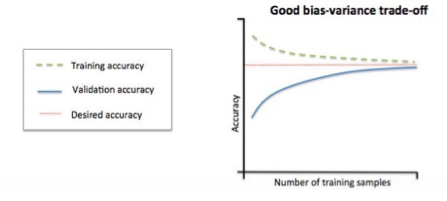
그래프에 따른 성능 변화를 봐야함

### high bias
- underfitting: train,test간의 차이가 작으나 기준에 미치지 못함
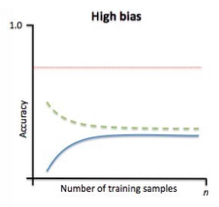


### high variance
- overfitting: test , traing 간의 차이가 너무 큼
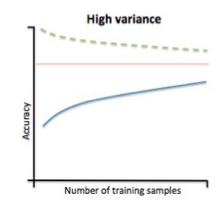

---


||underfitting 과소적합 |overfitting 과대적합|
|:-|:-|:-|
||- 모델이 실제 decision boundary에 비해 간단함|<br>- 모델이 해당 데이터에 맞게 학습되어 train, test간의 성능 차이 큼<br> - 딥러닝에서 특히 과대적합이 중요|


 적절한 균형 잡는것이 중요
### 과대적합 방지하기 위한 전략

#### 전통적인 머신러닝 기법

1. **차원에 비해서 확보된 데이터가 적은 경우**
    - dimension, feature 가 많아서 줄여야함
        - feature selection/extraction, dimesion reduction(eg.PCA)
        - learning curve : 적정 데이터 양을 찾음
    - ensemble
        - bagging  데이터의 일부를 **복원 추출**하여 여러개의 모델이 예측한 값의 **평균** 만듦

#### 딥러닝 기법 
    
- **절적한 모델 선택**   
       
    1. layer
    2. Node
    3. epoch
    
    > No free lunch Theorem
     
    > 안타깝지만 어떤 모델의 (층의 개수나 뉴런 개수에 해당하는) 적절한 크기나 구조를 결정하는 마법같은 공식은 없습니다. 여러 가지 다른 구조를 사용해 실험을 해봐야만 합니다
     https://www.tensorflow.org/tutorials/keras/overfit_and_underfit.
## 모델 단순화
### 볼륨 줄이기

   - Neural Net에서의 feature selection: 파라미터인 **볼륨(레이어,노드수)를 줄임**
        - 성능을 좌지우지하지만 과대적합도 발생
        
   - 볼륨(노드,레이어)이 많은 경우 학습해야할 parameter 많아 지면서 모델이 복잡해짐)
        - Google playground: 신경망 레이어 수, 노드 수에 따라서 성능,학습 속도가 바뀜
 

In [4]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16,input_shape=(13,),activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1))

- dense_000 은 메모리상에 남아있는 값들이여서 현재 283번 실행함.
- 16개의 유닛(노드)을 2개의 레이어(hidden & output) 사용

In [117]:
model.summary()

Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_281 (Dense)            (None, 16)                224       
_________________________________________________________________
dense_282 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_283 (Dense)            (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


activation fucntion 레이어로 사용
- 직관적 
    - [dense -> activation ]->[ dense - >activation] -> ...

In [14]:
#unit 을 16 ->4 로 줄임
model2=tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(4,input_shape=(13,)))
model2.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model2.add(tf.keras.layers.Dense(4))
model2.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model2.add(tf.keras.layers.Dense(1))

학습해야할 파라미터 수가 급격히 준것을 알수 잇음
- 4개의 유닛(노드)을 각 각 2개의 레이어(hidden & output) 사용
- input layer: 224 -> 56  (1/4만큼)
- 전체 파라미터 수: 513 ->81

In [15]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 56        
_________________________________________________________________
activation_6 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
activation_7 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


 ### epochs
 **epoch** 이 큰 경우 (동일한 데이터를 여러번 학습하여 모델이 해당 데이터에 최적화됨)
 
- 512 , 511 513 큰 차이 안나지만 관례고 2의 배수 사용
    - vectorization 사용시 cpu가 보통 짝수 갯수이기 때문에 동시처리에 더 적합함
   - 학생들이 동일한 문제만 계속풀면 해당 문제푸는것에만 익숙해져서 다른 문제에서는 잘 못풀음
     - **epoch 별로 정확도 그래프 그림**.
            - epoch가 늘어남에 따라 정확도가 변하는것을 확인
            - early stoping 성능 차이가 크게 없으면 epoch를 멈추도록함

In [11]:
#유닛 512개 - 과적합 가능성 높이려고 유닛을 늘림
model2=tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(512,input_shape=(13,)))
model2.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model2.add(tf.keras.layers.Dense(512))
model2.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model2.add(tf.keras.layers.Dense(1))

In [30]:
#epochs=10
model2.compile(loss='mse', optimizer='adam',
                 metrics=['mse','mae'])
model2.fit(boston.iloc[:,:-1].values, boston.target, epochs=10, batch_size=1)

Epoch 1/10
506/506 [==============================] - 1s 1ms/step - loss: 48.7173 - mse: 48.7173 - mae: 5.0468
Epoch 2/10
506/506 [==============================] - 1s 1ms/step - loss: 46.1176 - mse: 46.1176 - mae: 4.8639
Epoch 3/10
506/506 [==============================] - 1s 1ms/step - loss: 44.4290 - mse: 44.4290 - mae: 4.7967
Epoch 4/10
506/506 [==============================] - 1s 1ms/step - loss: 42.9113 - mse: 42.9113 - mae: 4.7711
Epoch 5/10
506/506 [==============================] - 1s 1ms/step - loss: 39.0477 - mse: 39.0477 - mae: 4.5198
Epoch 6/10
506/506 [==============================] - 1s 2ms/step - loss: 38.0836 - mse: 38.0836 - mae: 4.5723
Epoch 7/10
506/506 [==============================] - 1s 2ms/step - loss: 35.9419 - mse: 35.9419 - mae: 4.4474
Epoch 8/10
506/506 [==============================] - 1s 1ms/step - loss: 35.9729 - mse: 35.9729 - mae: 4.3888
Epoch 9/10
506/506 [==============================] - 1s 1ms/step - loss: 34.6573 - mse: 34.6573 - mae: 4.3632
E

In [31]:
model2.evaluate(boston.iloc[:,:-1],boston.target)

16/16 [==============================] - 0s 1ms/step - loss: 38.7979 - mse: 38.7979 - mae: 4.4122


[38.79787063598633, 38.79787063598633, 4.412232875823975]

- epoch 를 줄이니 mse(평균제곱오차)가 약 15 증가, mae(평균 절대 오차)도0.9 증가
- 각 train, test를 비교하니 (원래는 holdout 해서 해야함) epoch가 큰 모델에서 오차의 차이가 더 큼

In [25]:
#epochs=1
model2.compile(loss='mse', optimizer='adam',
                 metrics=['mse','mae'])
model2.fit(boston.iloc[:,:-1].values, boston.target, epochs=1, batch_size=1)

506/506 [==============================] - 1s 1ms/step - loss: 53.2174 - mse: 53.2174 - mae: 5.3066


In [29]:
model2.evaluate(boston.iloc[:,:-1],boston.target)

16/16 [==============================] - 0s 1ms/step - loss: 55.5876 - mse: 55.5876 - mae: 5.0169


[55.587608337402344, 55.587608337402344, 5.016929626464844]

훈련 손실과 검증 손실 그래프
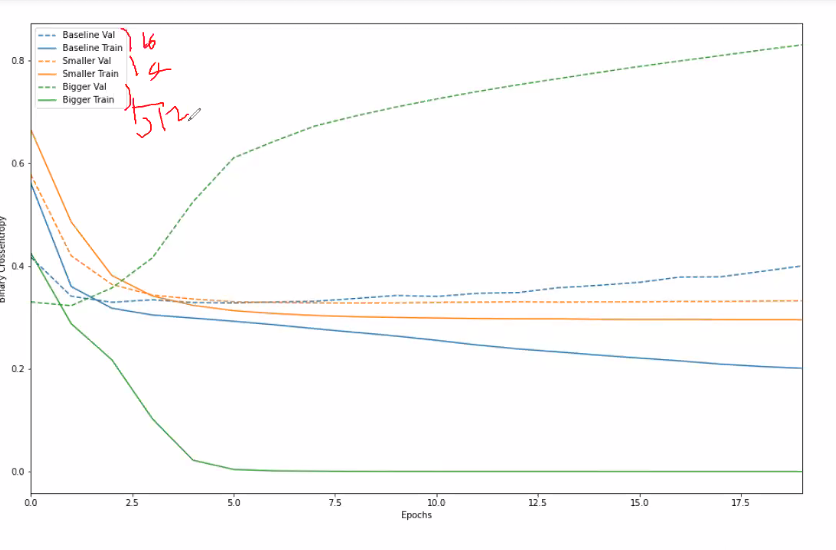

test, validation  손실 비교 필요
- 초록색 그래프 base 512 : 초반에 성능이 매우 나빠지면서 overfitting
- 파랑색 그래프 base 16 : 초반부터 overfitting
- 노락생 그래프 base 4 : train,validation 차이가 적으면서 일정함 <적절>
    - 차이가 나기 시작하기 직전 지점에서 epoch 멈춰야함   
 - 성능 기준에 따라서 undefiting, overfitting 이 될 수 있음 

regularization
파랑색 epoch 2
epoch 7 d에서 자름 

epoch 한번당 들어가는 비용이 크면 포기해야함
학습, 사용이 다름

### EarlyStopping  
- 매 epoch마다  metric에서 loss를 최소화(min) 하도록 하는것을 기반으로 loss가 더이상 줄어들지 않을 때 학습을 끝냄   
- 학습의 목표는  loss를 최소화 한다고 전제

In [143]:
tf.keras.callbacks.EarlyStopping

tensorflow.python.keras.callbacks.EarlyStopping

### Dropout
- overfitting 줄여주는  아주 중요하고 필수적인 기법
-  드롭아웃을 층에 적용하면 드롭 비율   `tf.keras.layers.Dropout(비율 )` 만큼 랜덤하게  유닛을 비활성화(0 으로 만듦) 
- 테스트 에서는 사용하지 않고 학습에서만 사용
- dropout layer는 이전 층의 출력에 적용
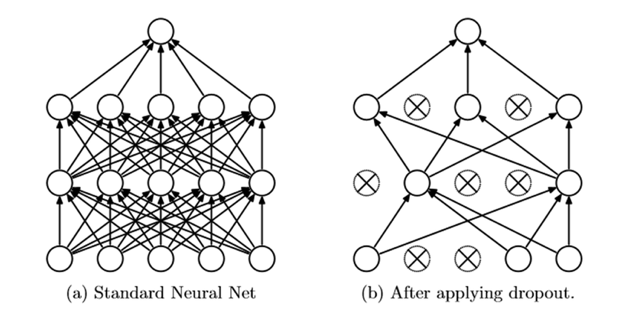

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

In [35]:
model2=tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(16,input_shape=(13,)))
model2.add(tf.keras.layers.Dropout(rate=0.2))# 랜덤하게 20%의 유닛을 비활성화
model2.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model2.add(tf.keras.layers.Dense(16))
model2.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model2.add(tf.keras.layers.Dense(1))

In [36]:
model2.compile(loss='mse', optimizer='adam')
model2.fit(boston.iloc[:,:-1],boston.target,epochs=5)
model2.summary()

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 3030.1438
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 1379.2394
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 895.6587
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 735.4166
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 510.5019
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
activation_10 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)         

학습 안 한느것을 학습 시키도록은 못하지만 학습 하는것을 안하도록 가능함

In [33]:
model2=tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(16,input_shape=(13,)))
model2.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model2.add(tf.keras.layers.Dense(16))
model2.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model2.add(tf.keras.layers.Dropout(0.2))  ## 
model2.add(tf.keras.layers.Dense(1))

In [34]:
model2.compile(loss='mse', optimizer='adam')
model2.fit(boston.iloc[:,:-1],boston.target,epochs=5)
model2.summary()

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 1404.8269
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 660.0493
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 425.1023
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 266.3089
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 252.6489
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                224       
_________________________________________________________________
activation_8 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_9 (Activation)    (None, 16)          

### trainable
- keras 에서 boolean(True or False)flag 이용해서 compile하기전에 사용하면 해당 레이어를 학습하지 않도록하여 컴파일 된 가중치 값을 유지(freezing)함.
    - 디폴트로  trainable = True로 컴파일 되므로 False로 적용하면 일단 trainable 속성만 비활성화

In [50]:
model2= tf.keras.models.Sequential()
layer1=tf.keras.layers.Dense(16,input_shape=(13,))
layer1.trainable =False  #학습 안시키는 옵션 있음. 

model2=tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(16,input_shape=(13,)))
model2.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model2.add(tf.keras.layers.Dense(16))
model2.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model2.add(tf.keras.layers.Dense(1))

In [51]:
model2.compile(loss='mse', optimizer='adam')
model2.fit(boston.iloc[:,:-1],boston.target,epochs=5)
model.summary()

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 5830.6626
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 1919.2671
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 502.0482
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 139.7979
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 94.3888
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_____________________________________________________

### 가중치 규제
-  복잡한 모델에서 학습을 하면서 weight이 커짐.
- `keras.regularizers`
  - regularization/weight decay: 파라미터의 변화량이 한꺼번에 하지 않게 weight값 크기에 페널티를 주어 규제를 함
        - loss function 에 주는 페널티 방식에 따라 나뉨
        
       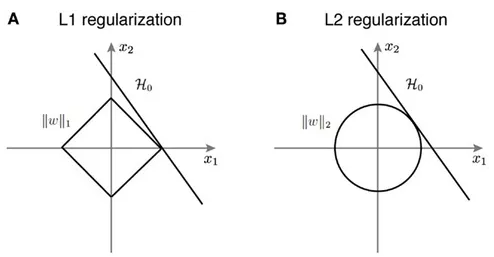
     - L1(Lasso): 절대값 이용
     - L2(Ridge): 제곱 이용
     - L1+L2 (elstic-net)
        
        참고 :https://towardsdatascience.com/regularization-in-machine-learning-connecting-the-dots-c6e030bfaddd

keras.regularizers.l2(0.001)로 설정

In [48]:
l2_model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,input_shape=(13,),
                           kernel_regularizer=keras.regularizers.l2(0.001),
                          activation='relu'),
    tf.keras.layers.Dense(16, 
                          kernel_regularizer=keras.regularizers.l2(0.001),
                          activation='relu'),
    tf.keras.layers.Dense(1)
])


In [49]:
l2_model.compile(loss='mse', optimizer='adam')
l2_model.fit(boston.iloc[:,:-1],boston.target,epochs=5)
l2_model.summary()

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 4190.8301
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 347.0220
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 157.7843
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 99.1862
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 78.9388
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_35 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
____________________________________________________

> 정리하면 신경망에서 과대적합을 방지하기 위해 가장 널리 사용하는 방법은 다음과 같습니다:
   -  더 많은 훈련 데이터를 모읍니다.
   -  네트워크의 용량을 줄입니다.
   -  가중치 규제를 추가합니다.
   -  드롭아웃을 추가합니다.
   - 이 문서에서 다루지 않은 중요한 방법 두 가지는 데이터 증식(data-augmentation)과 배치 정규화(batch normalization)입니다.


### Augmentation
- 기존의 데이터를 여러 방식으로 늘림
    - 예. 이미지 반전(flipping), 회전(rotation), 늘리기(stretching), (shearing), shifting,크기 바꾸기(rescaling) 자르기, 밝기 변화 등
### Normalization
#### BatchNormalization
- 배치 정규화는  딥러닝 고유의 기법으로 성능 좋음
    - batch size만큼  normalization 
    - 이전에는 weight update 함 (속도에 영향줌)
- 앞의 레이어의 값을 정규화(0~1 사이 값으로 변환)하여 뒤 레이어로 만들어줌
     
#### LayerNormalization
- 동일한 층(layer)간의 정규화함

1. 데이터 모으기
2. 볼륨 줄이기
3. eraly stoping
4. dropout
https://www.slideshare.net/ssuser06e0c5/normalization-72539464
#### WeightNormalization
- 가중치 정규화


In [57]:
#!pip install tensorflow-addons

In [55]:
import tensorflow_addons as tfa

In [56]:
tfa.layers.WeightNormalization

tensorflow_addons.layers.wrappers.WeightNormalization


--- 
텐서플로우에대한 개념이 잡히시나요?
개념이 잡히고 나서 이러한 기법들을 자세히 해야함.
태동기이다 보니 이전의 기법도 사라질 수 있음 
> No Free Lunch 
데이터마다 맞는 알고리즘이 있기 때문에 다양한 시도를 해봐야함.
기기학습은 기본적으로 해결책이 정해져 있지 않음]

TensorFlow 의 공식문서에서 초보자를 위한 내용 다 다룰 예정
#### estimator
- 사이킷런과 동일하지만 프로그래밍적 접근이 다름
    - 사이킷런 : 알고리즘 instance
    - 텐서플로우 : 사전에 텐서기반으로 만들어 놓은것
       - 사이킷처럼 가져다 손쉽게 쓰고 변홤함     
       - 처음 ,끝 봐야함
       - tf 1.0 에서 밀다가 keras 로 방향 틀음
           - `tf.keras` 
           - `tf.estimator` <다음주 + functional 방식으로 만드는것
           중요하고 어려움>
      학습할때 fit 아닌 `train`
  
9월 고급반에서는 도메인 별로 배울때 문제 없도록 함.